In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv("02_framingham_smote_train.csv")
df2= pd.read_csv("02_framingham_smote_train.csv")
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0,TenYearCHD
0,0,53,1,20.0,0.0,0,0,0,221.0,131.0,89.0,24.0,90.0,95.0,0,0,1,0,0
1,0,64,1,6.0,0.0,0,1,0,239.0,143.0,84.0,20.0,55.0,73.0,0,0,0,1,0
2,0,38,0,0.0,0.0,0,0,0,185.0,100.0,72.0,22.0,85.0,83.0,0,0,1,0,0
3,0,49,0,0.0,0.0,0,0,0,270.0,126.0,68.0,27.0,70.0,77.0,1,0,0,0,0
4,1,56,1,20.0,0.0,0,0,0,186.0,116.0,67.0,25.0,70.0,83.0,0,1,0,0,0


In [2]:
df["TenYearCHD"].value_counts()

TenYearCHD
0    2871
1    2871
Name: count, dtype: int64

In [3]:
df3= pd.read_csv("02_framingham_test.csv")
df3.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0,TenYearCHD
0,0,49,1,10.0,0.0,0,0,0,260.0,123.0,80.0,23.0,63.0,65.0,0,0,1,0,1
1,1,43,1,25.0,0.0,0,0,0,201.0,121.0,82.0,24.0,70.0,91.0,1,0,0,0,0
2,1,45,1,1.0,0.0,0,1,0,277.0,140.0,84.0,29.0,69.0,74.0,1,0,0,0,0
3,0,63,1,10.0,0.0,0,1,0,236.0,189.0,103.0,28.0,60.0,74.0,0,0,1,0,0
4,1,59,0,0.0,0.0,0,0,0,237.0,132.0,84.0,24.0,90.0,94.0,0,1,0,0,1


In [4]:
df3["TenYearCHD"].value_counts()

TenYearCHD
0    725
1    123
Name: count, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
X_train = df.drop(["TenYearCHD"], axis = 1)
y_train = df["TenYearCHD"]

X_test = df3.drop(["TenYearCHD"], axis = 1)
y_test = df3["TenYearCHD"]

In [6]:
# combine x_train and y_train
train_set = pd.merge(X_train, y_train, left_index=True, right_index=True)
train_set.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0,TenYearCHD
0,0,53,1,20.0,0.0,0,0,0,221.0,131.0,89.0,24.0,90.0,95.0,0,0,1,0,0
1,0,64,1,6.0,0.0,0,1,0,239.0,143.0,84.0,20.0,55.0,73.0,0,0,0,1,0
2,0,38,0,0.0,0.0,0,0,0,185.0,100.0,72.0,22.0,85.0,83.0,0,0,1,0,0
3,0,49,0,0.0,0.0,0,0,0,270.0,126.0,68.0,27.0,70.0,77.0,1,0,0,0,0
4,1,56,1,20.0,0.0,0,0,0,186.0,116.0,67.0,25.0,70.0,83.0,0,1,0,0,0


In [7]:
train_set["TenYearCHD"].value_counts()

TenYearCHD
0    2871
1    2871
Name: count, dtype: int64

In [8]:
X_train.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0
0,0,53,1,20.0,0.0,0,0,0,221.0,131.0,89.0,24.0,90.0,95.0,0,0,1,0
1,0,64,1,6.0,0.0,0,1,0,239.0,143.0,84.0,20.0,55.0,73.0,0,0,0,1
2,0,38,0,0.0,0.0,0,0,0,185.0,100.0,72.0,22.0,85.0,83.0,0,0,1,0
3,0,49,0,0.0,0.0,0,0,0,270.0,126.0,68.0,27.0,70.0,77.0,1,0,0,0
4,1,56,1,20.0,0.0,0,0,0,186.0,116.0,67.0,25.0,70.0,83.0,0,1,0,0


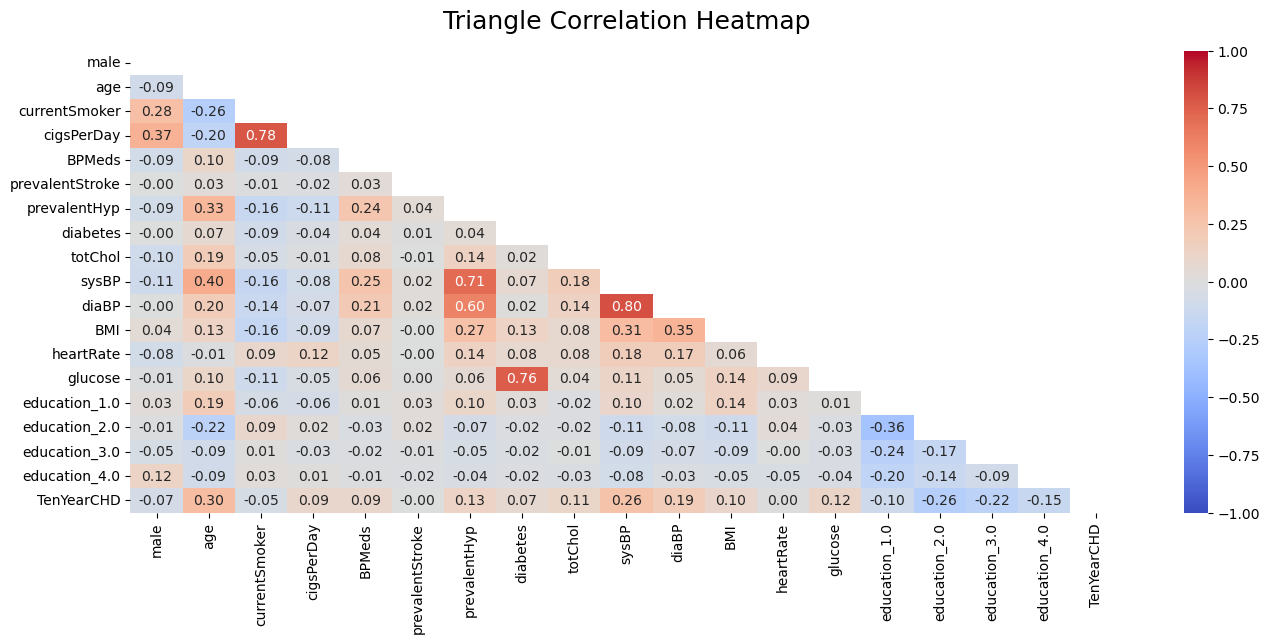

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(train_set.corr(), dtype= bool))

heatmap = sns.heatmap(train_set.corr(), mask= mask, vmin= -1, vmax= 1, annot= True, cmap= "coolwarm", fmt= ".2f")
heatmap.set_title("Triangle Correlation Heatmap", fontdict= {"fontsize": 18}, pad= 16)
plt.show()

only ap_hi and ap_lo have a quite high positive correlation. There is a 0.50 correlation between height and gender.

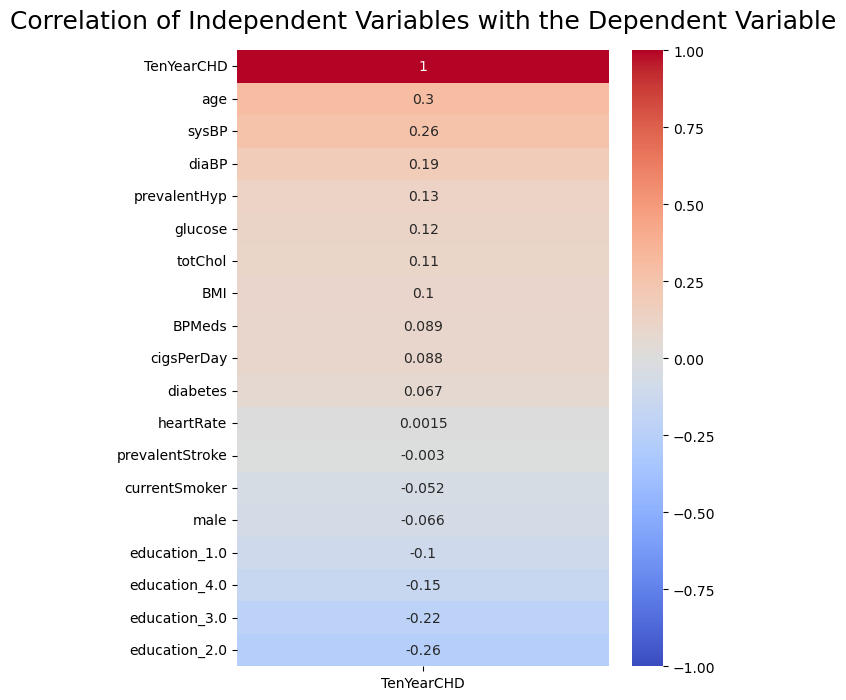

In [10]:
# correlation of indepenedent variables with the dependent variable
plt.figure(figsize=(6,8))
heatmap = sns.heatmap(train_set.corr()[["TenYearCHD"]].sort_values(by= "TenYearCHD", ascending= False), vmin= -1, vmax= 1, annot= True, cmap= "coolwarm")
heatmap.set_title("Correlation of Independent Variables with the Dependent Variable", fontdict= {"fontsize": 18}, pad= 16)
plt.show()

# Machine Learning Models

In [11]:
# import all necessary models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve


In [12]:
# model 1
m1 = "Logistic Regression"
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression model:",lr_acc_score*100, "\n")
print(classification_report(y_test, lr_predict))

confussion matrix
[[559 166]
 [ 84  39]]


Accuracy of Logistic Regression model: 70.51886792452831 

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       725
           1       0.19      0.32      0.24       123

    accuracy                           0.71       848
   macro avg       0.53      0.54      0.53       848
weighted avg       0.77      0.71      0.73       848



/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# model 2
m2 = "Naive Bayes"
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nb_pred)
nb_acc_score = accuracy_score(y_test, nb_pred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:", nb_acc_score*100, "\n")
print(classification_report(y_test, nb_pred))

confussion matrix
[[587 138]
 [ 72  51]]


Accuracy of Naive Bayes model: 75.23584905660378 

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       725
           1       0.27      0.41      0.33       123

    accuracy                           0.75       848
   macro avg       0.58      0.61      0.59       848
weighted avg       0.80      0.75      0.77       848



In [14]:
# model 3
m3 = "Random Forest Classifier"
rf = RandomForestClassifier(n_estimators=20, random_state=12, max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest model:", rf_acc_score*100, "\n")
print(classification_report(y_test, rf_predicted))

confussion matrix
[[547 178]
 [ 61  62]]


Accuracy of Random Forest model: 71.81603773584906 

              precision    recall  f1-score   support

           0       0.90      0.75      0.82       725
           1       0.26      0.50      0.34       123

    accuracy                           0.72       848
   macro avg       0.58      0.63      0.58       848
weighted avg       0.81      0.72      0.75       848



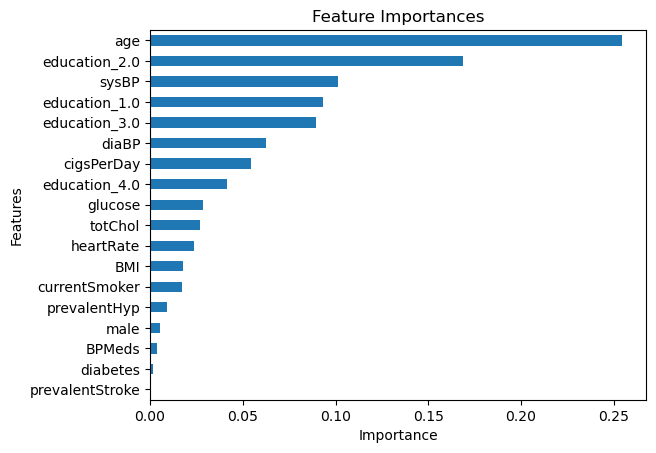

Feature importances and model saved successfully.


In [15]:
# Calculate and plot feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances.sort_values().plot(kind='barh')  # Using sort_values() for correct sorting
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Save feature importances to CSV
feature_importances.to_csv("feature_importances.csv")

# Save the trained CVD risk model as a .pkl file
import joblib
cvd_risk_model = rf  # rf is your trained random forest model
joblib.dump(cvd_risk_model, "cvd_risk_model.pkl")

print("Feature importances and model saved successfully.")


In [16]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27,
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[615 110]
 [ 82  41]]


Accuracy of Extreme Gradient Boost: 77.35849056603774 

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       725
           1       0.27      0.33      0.30       123

    accuracy                           0.77       848
   macro avg       0.58      0.59      0.58       848
weighted avg       0.79      0.77      0.78       848



In [17]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[488 237]
 [ 66  57]]


Accuracy of K-NeighborsClassifier: 64.26886792452831 

              precision    recall  f1-score   support

           0       0.88      0.67      0.76       725
           1       0.19      0.46      0.27       123

    accuracy                           0.64       848
   macro avg       0.54      0.57      0.52       848
weighted avg       0.78      0.64      0.69       848



In [18]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[615 110]
 [ 86  37]]


Accuracy of DecisionTreeClassifier: 76.88679245283019 

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       725
           1       0.25      0.30      0.27       123

    accuracy                           0.77       848
   macro avg       0.56      0.57      0.57       848
weighted avg       0.79      0.77      0.78       848



In [19]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[455 270]
 [ 46  77]]


Accuracy of Support Vector Classifier: 62.735849056603776 

              precision    recall  f1-score   support

           0       0.91      0.63      0.74       725
           1       0.22      0.63      0.33       123

    accuracy                           0.63       848
   macro avg       0.57      0.63      0.53       848
weighted avg       0.81      0.63      0.68       848



In [20]:
# fine tuning the random forest model (Manual from towards data science)
# model 3
m3 = "Random Forest Classifier"
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest model:", rf_acc_score*100, "\n")
print(classification_report(y_test, rf_predicted))

# with pprint you can see the default parameters of a model:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())


confussion matrix
[[677  48]
 [104  19]]


Accuracy of Random Forest model: 82.0754716981132 

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       725
           1       0.28      0.15      0.20       123

    accuracy                           0.82       848
   macro avg       0.58      0.54      0.55       848
weighted avg       0.78      0.82      0.80       848

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',  # Focus on F1-score for imbalanced data
    cv=5,
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Use the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END class_weight=balanced, max_depth=None, min_sam

In [24]:
# Best score (mean test score for the best parameters)
best_score = grid_search.best_score_

# Standard deviation of the score across cross-validation folds for the best parameters
best_index = grid_search.best_index_
std_of_best_score = grid_search.cv_results_['std_test_score'][best_index]

# Print the best score and its standard deviation
print(f"Best F1 Score: {best_score:.4f}")
print(f"Standard Deviation of the Best F1 Score: {std_of_best_score:.4f}")

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the confusion matrix, accuracy, and classification report
print("Confusion Matrix:")
print(conf_matrix)
print("\n")

print("Accuracy of the Best Random Forest Model:", accuracy * 100, "%\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Best F1 Score: 0.8778
Standard Deviation of the Best F1 Score: 0.1260
Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Confusion Matrix:
[[677  48]
 [104  19]]


Accuracy of the Best Random Forest Model: 82.0754716981132 %

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       725
           1       0.28      0.15      0.20       123

    accuracy                           0.82       848
   macro avg       0.58      0.54      0.55       848
weighted avg       0.78      0.82      0.80       848



In [27]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(scale_pos_weight=(len(y_train) / sum(y_train)), random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate performance metrics
xgb_conf_matrix = confusion_matrix(y_test, y_pred_xgb)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

# Print performance metrics
print("XGBoost Classifier\n")
print("Confusion Matrix:")
print(xgb_conf_matrix)
print("\n")

print("Accuracy of XGBoost Model:", xgb_accuracy * 100, "%\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classifier

Confusion Matrix:
[[634  91]
 [ 93  30]]


Accuracy of XGBoost Model: 78.30188679245283 %

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       725
           1       0.25      0.24      0.25       123

    accuracy                           0.78       848
   macro avg       0.56      0.56      0.56       848
weighted avg       0.78      0.78      0.78       848



In [29]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)

# Calculate performance metrics
logreg_conf_matrix = confusion_matrix(y_test, y_pred_logreg)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)

# Print performance metrics
print("\nLogistic Regression\n")
print("Confusion Matrix:")
print(logreg_conf_matrix)
print("\n")

print("Accuracy of Logistic Regression Model:", logreg_accuracy * 100, "%\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression

Confusion Matrix:
[[629  96]
 [ 86  37]]


Accuracy of Logistic Regression Model: 78.5377358490566 %

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       725
           1       0.28      0.30      0.29       123

    accuracy                           0.79       848
   macro avg       0.58      0.58      0.58       848
weighted avg       0.79      0.79      0.79       848



/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate performance metrics
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Print performance metrics
print("Random Forest Classifier\n")
print("Confusion Matrix:")
print(rf_conf_matrix)
print("\n")

print("Accuracy of Random Forest Model:", rf_accuracy * 100, "%\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier

Confusion Matrix:
[[677  48]
 [104  19]]


Accuracy of Random Forest Model: 82.0754716981132 %

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       725
           1       0.28      0.15      0.20       123

    accuracy                           0.82       848
   macro avg       0.58      0.54      0.55       848
weighted avg       0.78      0.82      0.80       848



In [32]:
# tuning a model, using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# random grid for the predefined parameters
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [33]:
# with this one can use the random grid to search for best hyperparameters
# first create the base model to tune
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# fit the random search
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   0.0s[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   0.0s

[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10

/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   1.9s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   5.2s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  10.3s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   8.3s
[CV] END bootstrap=True, max_depth=10,

/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
159 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
119 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packa

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 400, 600,
                                                         800, 1000, 1200, 1400,
                                                         1600, 1800, 2000]},
                   random_state=42, verbose=2)

# documentation of random search CV
n_iter: controls the number of different combinations to try

cv: which number of folds to use for cross validation

More iterations = wider search space, more cv folds reduces the chance of overfitting, increasing leads to increaed run times

In [34]:
# view the best parameters
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [35]:
# evaluate the optimized model
m3 = "Random Forest Classifier"
rf2 = RandomForestClassifier(n_estimators = 1600, min_samples_split = 2, min_samples_leaf = 4, max_features = "sqrt", max_depth = 20, bootstrap = True, random_state=42)
rf2.fit(X_train,y_train)
rf2_predicted = rf2.predict(X_test)
rf2_conf_matrix = confusion_matrix(y_test, rf2_predicted)
rf2_acc_score = accuracy_score(y_test, rf2_predicted)
print("confussion matrix")
print(rf2_conf_matrix)
print("\n")
print("Accuracy of Random Forest model:", rf2_acc_score*100, "\n")
print(classification_report(y_test, rf2_predicted))


confussion matrix
[[665  60]
 [102  21]]


Accuracy of Random Forest model: 80.89622641509435 

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       725
           1       0.26      0.17      0.21       123

    accuracy                           0.81       848
   macro avg       0.56      0.54      0.55       848
weighted avg       0.78      0.81      0.79       848



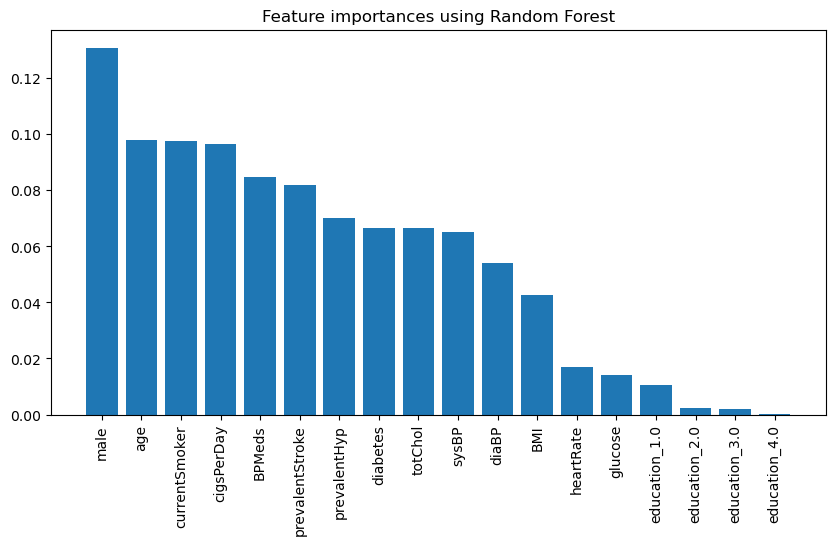

In [36]:
# feature importance --> to be optimized this based on random forest
importances = rf2.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

plt.figure(figsize=(10,5))
plt.title("Feature importances using Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]) ,features)
plt.xticks(rotation=90)
plt.show()

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define refined hyperparameters
n_estimators = [100, 300, 500, 700, 1000]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [10, 20, 30, 40, 50]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Refined random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

# Instantiate RandomForest and RandomizedSearchCV
rf3 = RandomForestClassifier(random_state=42)
rf3_random = RandomizedSearchCV(estimator=rf3, param_distributions=random_grid,
                               n_iter=50, cv=5, verbose=2, random_state=42,
                               n_jobs=-1, scoring='roc_auc')

# Fit the model
rf3_random.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100

/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
55 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
41 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-package

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500, 700,
                                                         1000]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [38]:
rf3_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 50,
 'bootstrap': False}

In [39]:
# evaluate the optimized model again

rf4 = RandomForestClassifier(n_estimators = 1000, min_samples_split = 2, min_samples_leaf = 1, max_features = "sqrt", max_depth = 10, bootstrap = True, random_state=42)
rf4.fit(X_train,y_train)
rf4_predicted = rf4.predict(X_test)
rf4_conf_matrix = confusion_matrix(y_test, rf4_predicted)
rf4_acc_score = accuracy_score(y_test, rf4_predicted)
print("confussion matrix")
print(rf2_conf_matrix)
print("\n")
print("Accuracy of Random Forest model:", rf4_acc_score*100, "\n")
print(classification_report(y_test, rf4_predicted))

confussion matrix
[[665  60]
 [102  21]]


Accuracy of Random Forest model: 79.36320754716981 

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       725
           1       0.25      0.21      0.23       123

    accuracy                           0.79       848
   macro avg       0.56      0.55      0.55       848
weighted avg       0.78      0.79      0.79       848



In [ ]:
# feature importance --> to be optimized this based on random forest
importances = rf4.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

plt.figure(figsize=(10,5))
plt.title("Feature importances using Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]) ,features)
plt.xticks(rotation=90)
plt.show()

# safe the model and feature importance

In [ ]:
cvd_risk_model = rf
# save the model as pkl

import joblib
joblib.dump(cvd_risk_model, "cvd_risk_model.pkl")


# save the nodel importances



In [ ]:
# emr bots! artificial generated electronics medical records
# cdss in r or ython,

# exercise folder moodle

# 100 patients folder

In [ ]:
# min max scaler!

In [40]:
m3 = "Random Forest Classifier"
rf = RandomForestClassifier(n_estimators=20, random_state=12, max_depth=5)
rf.fit(X_train, y_train)

# Predict the class labels
rf_predicted = rf.predict(X_test)

# Predict the probabilities for each class
rf_pred_proba = rf.predict_proba(X_test)

# Confusion Matrix and Accuracy Score
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)

print("Confusion Matrix:")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest model:", rf_acc_score * 100, "\n")
print(classification_report(y_test, rf_predicted))

# Print predicted probabilities for the first few rows
print("Predicted probabilities for the first few rows:")
print(rf_pred_proba[:5])  # Show the probabilities for the first 5 rows

Confusion Matrix:
[[547 178]
 [ 61  62]]


Accuracy of Random Forest model: 71.81603773584906 

              precision    recall  f1-score   support

           0       0.90      0.75      0.82       725
           1       0.26      0.50      0.34       123

    accuracy                           0.72       848
   macro avg       0.58      0.63      0.58       848
weighted avg       0.81      0.72      0.75       848

Predicted probabilities for the first few rows:
[[0.66560612 0.33439388]
 [0.69637492 0.30362508]
 [0.67858052 0.32141948]
 [0.32670257 0.67329743]
 [0.62267504 0.37732496]]


In [46]:
import pandas as pd

# Create a DataFrame from the predicted probabilities
probabilities_df = pd.DataFrame(rf_pred_proba)

# Display the first few rows
print(probabilities_df.head())

# Add a sum column (sum of probabilities across all classes for each row)
probabilities_df["sum"] = probabilities_df.sum(axis=1)

# Display the updated DataFrame
print(probabilities_df.head())


          0         1
0  0.665606  0.334394
1  0.696375  0.303625
2  0.678581  0.321419
3  0.326703  0.673297
4  0.622675  0.377325
          0         1  sum
0  0.665606  0.334394  1.0
1  0.696375  0.303625  1.0
2  0.678581  0.321419  1.0
3  0.326703  0.673297  1.0
4  0.622675  0.377325  1.0


In [47]:
probabilities_df.head()

,0,1,sum
0,0.665606,0.334394,1.0
1,0.696375,0.303625,1.0
2,0.678581,0.321419,1.0
3,0.326703,0.673297,1.0
4,0.622675,0.377325,1.0


In [ ]:
# logic for predicted probabilities
low_threshold = rf_pred_proba.quantile(0.33)
medium_threshold = rf_pred_proba.quantile(0.66)

def categorize_propability():
    if rf_pred_proba < low_threshold:
        return "Low Risk"
    elif rf_pred_proba < medium_threshold:
        return "Medium Risk"
    else:
        return "High Risk"


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Define the Random Forest model
rf = RandomForestClassifier(random_state=12)

# Set up the parameter grid for optimization
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [5, 10, 20, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for best split
    'class_weight': [None, 'balanced']  # Handling class imbalance
}

# Set up the GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_rf = grid_search.best_estimator_
print("Best hyperparameters found: ", grid_search.best_params_)

# Make predictions with the best model
rf_predicted = best_rf.predict(X_test)

# Predict the probabilities for each class
rf_pred_proba = best_rf.predict_proba(X_test)

# Confusion Matrix and Accuracy Score
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)

print("Confusion Matrix:")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest model:", rf_acc_score * 100, "\n")
print(classification_report(y_test, rf_predicted))

# Print predicted probabilities for the first few rows
print("Predicted probabilities for the first few rows:")
print(rf_pred_proba[:5])  # Show the probabilities for the first 5 rows

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] END class_weight=None, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END class_weight=None, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END class_weight=None, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimat

/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
724 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-pac

Best hyperparameters found:  {'class_weight': None, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Confusion Matrix:
[[678  47]
 [107  16]]


Accuracy of Random Forest model: 81.83962264150944 

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       725
           1       0.25      0.13      0.17       123

    accuracy                           0.82       848
   macro avg       0.56      0.53      0.54       848
weighted avg       0.78      0.82      0.79       848

Predicted probabilities for the first few rows:
[[0.88 0.12]
 [0.84 0.16]
 [0.84 0.16]
 [0.58 0.42]
 [0.79 0.21]]


In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline with StandardScaler and RandomForestClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Apply StandardScaler for feature scaling
    ('rf', RandomForestClassifier(random_state=12))  # RandomForest model
])

# Set up the parameter grid for optimization
param_grid = {
    'rf__n_estimators': [50, 100, 150],  # Number of trees in the forest
    'rf__max_depth': [5, 10, 20, None],  # Maximum depth of the tree
    'rf__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'rf__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'rf__max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for best split
    'rf__class_weight': [None, 'balanced']  # Handling class imbalance
}

# Set up GridSearchCV with cross-validation and F1-weighted scoring
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_rf = grid_search.best_estimator_
print("Best hyperparameters found: ", grid_search.best_params_)

# Make predictions with the best model
rf_predicted = best_rf.predict(X_test)

# Predict the probabilities for each class
rf_pred_proba = best_rf.predict_proba(X_test)

# Confusion Matrix and Accuracy Score
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)

print("Confusion Matrix:")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest model:", rf_acc_score * 100, "\n")
print(classification_report(y_test, rf_predicted))

# Print predicted probabilities for the first few rows
print("Predicted probabilities for the first few rows:")
print(rf_pred_proba[:5])  # Show the probabilities for the first 5 rows

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] END rf__class_weight=None, rf__max_depth=5, rf__max_features=auto, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50; total time=   0.0s
[CV] END rf__class_weight=None, rf__max_depth=5, rf__max_features=auto, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50; total time=   0.0s
[CV] END rf__class_weight=None, rf__max_depth=5, rf__max_features=auto, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50; total time=   0.0s
[CV] END rf__class_weight=None, rf__max_depth=5, rf__max_features=auto, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100; total time=   0.0s
[CV] END rf__class_weight=None, rf__max_depth=5, rf__max_features=auto, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100; total time=   0.0s
[CV] END rf__class_weight=None, rf__max_depth=5, rf__max_features=auto, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_es

/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
652 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Use

Best hyperparameters found:  {'rf__class_weight': None, 'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Confusion Matrix:
[[678  47]
 [107  16]]


Accuracy of Random Forest model: 81.83962264150944 

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       725
           1       0.25      0.13      0.17       123

    accuracy                           0.82       848
   macro avg       0.56      0.53      0.54       848
weighted avg       0.78      0.82      0.79       848

Predicted probabilities for the first few rows:
[[0.88 0.12]
 [0.85 0.15]
 [0.84 0.16]
 [0.58 0.42]
 [0.78 0.22]]


In [67]:
m3 = "Random Forest Classifier"
rf = RandomForestClassifier(n_estimators=15, random_state=12, max_depth=5)
rf.fit(X_train, y_train)

# Predict the class labels
rf_predicted = rf.predict(X_test)

# Predict the probabilities for each class
rf_pred_proba = rf.predict_proba(X_test)

# Confusion Matrix and Accuracy Score
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)

print("Confusion Matrix:")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest model:", rf_acc_score * 100, "\n")
print(classification_report(y_test, rf_predicted))

# Print predicted probabilities for the first few rows
print("Predicted probabilities for the first few rows:")
print(rf_pred_proba[:5])  # Show the probabilities for the first 5 rows

Confusion Matrix:
[[560 165]
 [ 66  57]]


Accuracy of Random Forest model: 72.75943396226415 

              precision    recall  f1-score   support

           0       0.89      0.77      0.83       725
           1       0.26      0.46      0.33       123

    accuracy                           0.73       848
   macro avg       0.58      0.62      0.58       848
weighted avg       0.80      0.73      0.76       848

Predicted probabilities for the first few rows:
[[0.64665739 0.35334261]
 [0.68564384 0.31435616]
 [0.67731918 0.32268082]
 [0.34014296 0.65985704]
 [0.64708156 0.35291844]]


In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline with StandardScaler and RandomForestClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Apply StandardScaler for feature scaling
    ('rf', RandomForestClassifier(random_state=12))  # RandomForest model
])

# Set up the parameter grid for optimization
param_grid = {
    'rf__n_estimators': [50, 100, 150],  # Number of trees in the forest
    'rf__max_depth': [5, 10, 20, None],  # Maximum depth of the tree
    'rf__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'rf__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'rf__max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for best split
    'rf__class_weight': [None, 'balanced']  # Handling class imbalance
}

# Set up GridSearchCV with cross-validation and F1-weighted scoring
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model (based on the highest F1 score)
best_rf = grid_search.best_estimator_
print("Best hyperparameters found: ", grid_search.best_params_)

# Make predictions with the best model
rf_predicted = best_rf.predict(X_test)

# Predict the probabilities for each class
rf_pred_proba = best_rf.predict_proba(X_test)

# Confusion Matrix and Accuracy Score
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)

print("Confusion Matrix:")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest model:", rf_acc_score * 100, "\n")
print(classification_report(y_test, rf_predicted))

# Print predicted probabilities for the first few rows
print("Predicted probabilities for the first few rows:")
print(rf_pred_proba[:5])  # Show the probabilities for the first 5 rows

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] END rf__class_weight=None, rf__max_depth=5, rf__max_features=auto, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50; total time=   0.0s
[CV] END rf__class_weight=None, rf__max_depth=5, rf__max_features=auto, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50; total time=   0.0s
[CV] END rf__class_weight=None, rf__max_depth=5, rf__max_features=auto, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50; total time=   0.0s
[CV] END rf__class_weight=None, rf__max_depth=5, rf__max_features=auto, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50; total time=   0.0s
[CV] END rf__class_weight=None, rf__max_depth=5, rf__max_features=auto, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50; total time=   0.0s
[CV] END rf__class_weight=None, rf__max_depth=5, rf__max_features=auto, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_esti

/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
625 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Use

Best hyperparameters found:  {'rf__class_weight': None, 'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Confusion Matrix:
[[678  47]
 [107  16]]


Accuracy of Random Forest model: 81.83962264150944 

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       725
           1       0.25      0.13      0.17       123

    accuracy                           0.82       848
   macro avg       0.56      0.53      0.54       848
weighted avg       0.78      0.82      0.79       848

Predicted probabilities for the first few rows:
[[0.88 0.12]
 [0.85 0.15]
 [0.84 0.16]
 [0.58 0.42]
 [0.78 0.22]]


In [74]:
# Define the RandomForest model with class weights balanced or custom weighting
rf = RandomForestClassifier(n_estimators=15, class_weight='balanced', random_state=42, max_depth=5)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       725
           1       0.27      0.45      0.34       123

    accuracy                           0.75       848
   macro avg       0.58      0.62      0.59       848
weighted avg       0.80      0.75      0.77       848

Confusion Matrix:
[[577 148]
 [ 68  55]]


In [75]:
# Define the RandomForest model with class weights balanced or custom weighting
rf = RandomForestClassifier(n_estimators=15, class_weight='balanced', random_state=42, max_depth=5)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       725
           1       0.27      0.45      0.34       123

    accuracy                           0.75       848
   macro avg       0.58      0.62      0.59       848
weighted avg       0.80      0.75      0.77       848

Confusion Matrix:
[[577 148]
 [ 68  55]]


In [78]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, make_scorer
# Define the RandomForest model with class weights balanced or custom weighting
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Set up the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Define a custom scorer for F1-score with focus on predicting class 1
f1_scorer = make_scorer(f1_score, pos_label=1)

# Use GridSearchCV for hyperparameter tuning, focusing on F1 score for class 1
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring=f1_scorer)

# Train the model with the best combination of hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_rf = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_rf.predict(X_test)

# Evaluate the model using classification report and confusion matrix
print("Best Hyperparameters:", grid_search.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optionally, you can also calculate F1 score directly if you want to monitor it
f1 = f1_score(y_test, y_pred, pos_label=1)
print(f"F1 Score for class 1: {f1:.4f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END boot

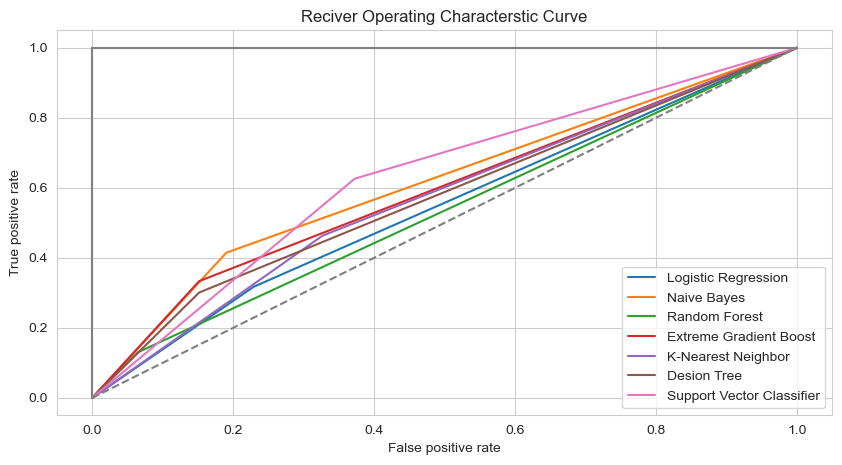

In [79]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nb_pred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()